<div style="color: #FFC72C; text-align: center; border-top: 1px solid #A2AAAD; border-bottom: 1px solid #A2AAAD;">
    <h1 style="color: #A2AAAD; margin: 50px auto 0; font-size: 60px;">Data Analysis</h1>
    <p style="color: #A2AAAD; margin: 0px; font-size: 20px;">Federated Deep Reinforced Learning to enable CH Selection in a IoV</p>
    <p style="color: #A2AAAD; margin: 0px auto 50px; font-size: 20px;">Chandler Scott</p>
</div>

<div style="color: #FFC72C; text-align: center; border-top: 1px solid #A2AAAD; border-bottom: 1px solid #A2AAAD;">
    <h3 style="color: #A2AAAD; margin: 50px auto;">Convert .sca file to a .csv</h3>
</div>

In [44]:
import os
sca_file = 'General-#0.sca'
output_file = 'Results_4-17.csv'
results_filepath = '/opt/smart_farm_network_sim/smart_farm/simulations/results'

run_command = lambda: \
    f'opp_scavetool x {results_filepath}/{sca_file} -o {results_filepath}/{output_file}'

!{run_command()}

Exported 652 scalars, 3049 parameters, 9 statistics, 81 histograms


<div style="color: #FFC72C; text-align: center; border-top: 1px solid #A2AAAD; border-bottom: 1px solid #A2AAAD;">
    <h3 style="color: #A2AAAD; margin: 50px auto;">Read .csv into Pandas dataframe and clean data</h3>
</div>

In [45]:
import pandas as pd

csv_file = f'{results_filepath}/Results_4-17.csv'
df = pd.read_csv(csv_file, low_memory=False)


df = df.loc[(df['type'] == 'scalar'), ['name', 'module', 'value']]

df = df[df['name'].isin(['numSent', 'numRetry'])]
df = df.set_index('module')
df.index = df.index.map(lambda x: x.split('.')[1])


<div style="color: #FFC72C; text-align: center; border-top: 1px solid #A2AAAD; border-bottom: 1px solid #A2AAAD;">
    <h3 style="color: #A2AAAD; margin: 50px auto;">Plot charts from dataframe</h3>
</div>

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


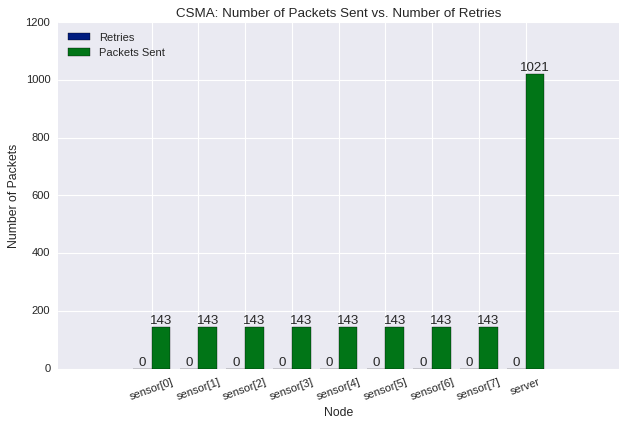

In [46]:
import matplotlib.pyplot as plt
import numpy as np

pivot_df = df.pivot_table(index='module', columns='name', values='value', aggfunc='sum')

pivot_df = pivot_df.astype(int)

modules = pivot_df.index
bar_width = 0.4  # Width of the bars
index = np.arange(len(modules))  # Index for the x-axis

fig, ax = plt.subplots()
bar1 = ax.bar(index - bar_width/2, pivot_df['numRetry'], bar_width, label='Retries')
bar2 = ax.bar(index + bar_width/2, pivot_df['numSent'], bar_width, label='Packets Sent')

for bar in bar1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
for bar in bar2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')


# Adding labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Node')
ax.set_ylabel('Number of Packets')
ax.set_title('CSMA: Number of Packets Sent vs. Number of Retries')
ax.set_xticks(index)
ax.set_xticklabels(modules, rotation=20)  # Rotate module names for better visibility
ax.legend(loc='upper left')

print(plt.style.available)

plt.style.use('seaborn-dark-palette')
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()